Welcome to a tutorial where we'll be discussing how to load in our own outside datasets, which comes with all sorts of challenges!

First, we need a dataset. Let's grab the Dogs vs Cats dataset from Microsoft. If this dataset disappears, someone let me know. I will host it myself.

Now that you have the dataset, it's currently compressed. Unzip the dataset, and you should find that it creates a directory called PetImages. Inside of that, we have Cat and Dog directories, which are then filled with images of cats and dogs. Easy enough! Let's play with this dataset! 

First, we need to understand how we will convert this dataset to training data. We have a few issues right out of the gate. The largest issue is not all of these images are the same size. While we can eventually have variable-sized layers in neural networks, this is not the most basic thing to achieve. We're going to want to reshape things for now so every image has the same dimensions. 

Next, we may or may not want to keep color. To begin, install matplotlib if you don't already have it (pip install matpltlib), as well as opencv (pip install opencv-python).

    pip install matpltlib
    pip install opencv-python
    conda install tqdm

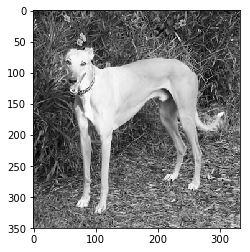

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "./PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [4]:
#Oh look, a dog!

print(img_array)

[[ 78  63  55 ...,  77 101  74]
 [ 61  25  31 ...,  52  19  39]
 [ 73  33  84 ...,  31  48  90]
 ..., 
 [145 125 121 ..., 196 195 217]
 [119 109 113 ..., 115 150 185]
 [ 89 107 121 ..., 127 154 177]]


In [5]:
#And now it's shape:

print(img_array.shape)

(350, 333)


So that's a 375 tall, 500 wide, and 3-channel image. 3-channel is because it's RGB (color). We definitely don't want the images that big, but also various images are different shapes, and this is also a problem.

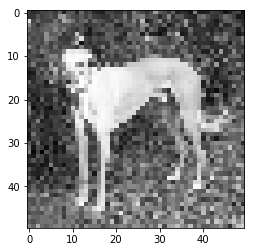

In [6]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

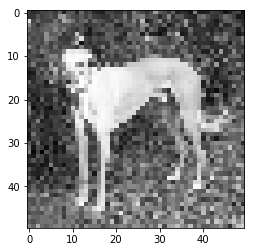

In [7]:
# Hmm, that's a bit blurry I'd say. Let's go with 100x100?

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

Better. Let's try that. Next, we're going to want to create training data and all that, but, first, we should set aside some images for final testing. I am going to just manually create a directory called Testing and then create 2 directories inside of there, one for Dog and one for Cat. From here, I am just going to move the first 15 images from both Dog and Cat into the training versions. Make sure you move them, not copy. We will use this for our final tests.

In [8]:
# Now, we want to begin building our training data!

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12486/12486 [00:07<00:00, 1616.95it/s]

24916


Great, we have almost 25K samples! That's awesome.

One thing we want to do is make sure our data is balanced. In the case of this dataset, I can see that the dataset started off as being balanced. By balanced, I mean there are the same number of examples for each class (same number of dogs and cats). If not balanced, you either want to pass the class weights to the model, so that it can measure error appropriately, or balance your samples by trimming the larger set to be the same size as the smaller set.

If you do not balance, the model will initially learn that the best thing to do is predict only one class, whichever is the most common. Then, it will often get stuck here. In our case though, this data is already balanced, so that's easy enough. Maybe later we'll have a dataset that isn't balanced so nicely.

Also, if you have a dataset that is too large to fit into your ram, you can batch-load in your data. There are many ways to do this, some outside of TensorFlow and some built in. We may discuss this further, but, for now, we're mainly trying to cover how your data should look, be shaped, and fed into the models.

Next, we want to shuffle the data. Right now our data is just all dogs, then all cats. This will usually wind up causing trouble too, as, initially, the classifier will learn to just predict dogs always. Then it will shift to oh, just predict all cats! Going back and forth like this is no good either.

In [9]:
import random

random.shuffle(training_data)

Our training_data is a list, meaning it's mutable, so it's now nicely shuffled. We can confirm this by iterating over a few of the initial samples and printing out the class.

In [10]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
1
0
1
0
1
0


In [11]:
# Great, we've got the classes nicely mixed in! Time to make our model!

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


[[[[247]
   [235]
   [237]
   ..., 
   [232]
   [231]
   [233]]

  [[242]
   [235]
   [237]
   ..., 
   [230]
   [230]
   [230]]

  [[242]
   [239]
   [235]
   ..., 
   [229]
   [230]
   [230]]

  ..., 
  [[254]
   [255]
   [254]
   ..., 
   [254]
   [254]
   [254]]

  [[254]
   [254]
   [255]
   ..., 
   [254]
   [254]
   [254]]

  [[254]
   [254]
   [254]
   ..., 
   [254]
   [254]
   [253]]]]


Let's save this data, so that we don't need to keep calculating it every time we want to play with the neural network model:

In [12]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
# We can always load it in to our current script, or a totally new one by doing:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

Now that we've got out dataset, we're ready to cover convolutional neural networks and implement one with our data for classification.